**Soal No 1**

Permasalahan: Sebuah perusahaan memiliki beberapa cabang di kota yang berbeda. Mereka ingin menemukan rute terpendek untuk mengirim barang dari kantor pusat di kota A ke kantor cabang di kota G. Berikut adalah jarak antara kota-kota yang dihubungkan:

A-B: 4
A-C: 2
B-C: 5
B-D: 10
C-D: 3
C-E: 6
D-E: 2
D-F: 7
E-G: 1
F-G: 5


Rute terpendek: ['A', 'C', 'D', 'E', 'G'] dengan biaya: 8


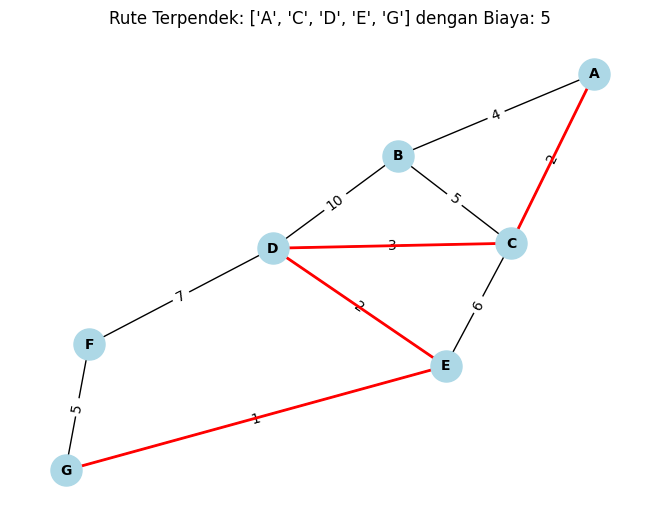

In [8]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graf, mulai, tujuan):
    antrian = [(0, mulai, [])]
    terlihat = set()
    mins = {mulai: 0}

    while antrian:
        (biaya, v1, jalur) = heapq.heappop(antrian)
        if v1 in terlihat:
            continue

        terlihat.add(v1)
        jalur = jalur + [v1]
        if v1 == tujuan:
            return (biaya, jalur)

        for c, v2 in graf.get(v1, ()):
            if v2 in terlihat:
                continue
            prev = mins.get(v2, None)
            berikutnya = biaya + c
            if prev is None or berikutnya < prev:
                mins[v2] = berikutnya
                heapq.heappush(antrian, (berikutnya, v2, jalur))

    return float("inf")

graf = {
    'A': [(4, 'B'), (2, 'C')],
    'B': [(5, 'C'), (10, 'D')],
    'C': [(3, 'D'), (6, 'E')],
    'D': [(2, 'E'), (7, 'F')],
    'E': [(1, 'G')],
    'F': [(5, 'G')],
}

biaya, jalur = dijkstra(graf, 'A', 'G')
print(f"Rute terpendek: {jalur} dengan biaya: {biaya}")

# Visualisasi dengan networkx dan matplotlib
G = nx.Graph()

# Menambahkan edge ke graf
for node in graf:
    for (biaya, neighbor) in graf[node]:
        G.add_edge(node, neighbor, weight=biaya)

# Mengatur posisi node
pos = nx.spring_layout(G)

# Menggambar semua node dan edge
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')

# Menambahkan label pada edge
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Menonjolkan rute terpendek
path_edges = list(zip(jalur, jalur[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

plt.title(f"Rute Terpendek: {jalur} dengan Biaya: {biaya}")
plt.show()


**Soal NO 2**

Permasalahan: Suatu perusahaan hanya memberikan bonus kepada karyawan yang memiliki kinerja baik (1) dan tidak pernah terlambat (0).

Karyawan yang mendapat bonus: [1, 0, 0, 1, 0]


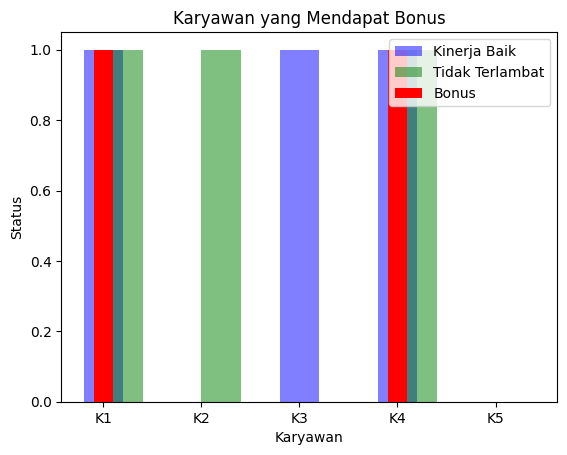

In [9]:
import matplotlib.pyplot as plt

kinerja_baik = [1, 0, 1, 1, 0]
tidak_terlambat = [1, 1, 0, 1, 0]

bonus = [kinerja_baik[i] and tidak_terlambat[i] for i in range(len(kinerja_baik))]
print(f"Karyawan yang mendapat bonus: {bonus}")

# Visualisasi dengan matplotlib
karyawan = range(1, len(kinerja_baik) + 1)  # Daftar karyawan (1, 2, 3, 4, 5)

fig, ax = plt.subplots()

# Bar untuk kinerja baik
ax.bar(karyawan, kinerja_baik, width=0.4, label='Kinerja Baik', align='center', alpha=0.5, color='b')
# Bar untuk tidak terlambat
ax.bar(karyawan, tidak_terlambat, width=0.4, label='Tidak Terlambat', align='edge', alpha=0.5, color='g')
# Bar untuk bonus
ax.bar(karyawan, bonus, width=0.2, label='Bonus', align='center', color='r')

ax.set_xlabel('Karyawan')
ax.set_ylabel('Status')
ax.set_title('Karyawan yang Mendapat Bonus')
ax.set_xticks(karyawan)
ax.set_xticklabels([f'K{i}' for i in karyawan])
ax.legend()

plt.show()


**Soal No 3**

Permasalahan:Kita akan membuat sebuah pohon keputusan untuk memprediksi jenis buah berdasarkan dua fitur: berat buah (gram) dan tekstur kulit (halus atau kasar).

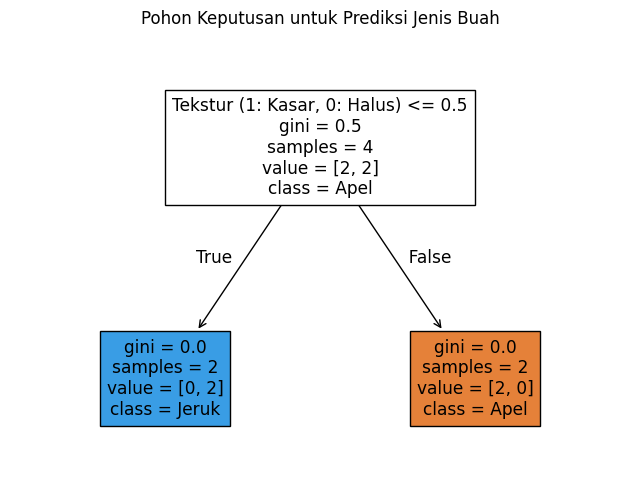

In [10]:
# Impor library yang diperlukan
from sklearn import tree
import matplotlib.pyplot as plt

# Data buah: fitur [berat, tekstur] dan label jenis buah
fitur = [[140, 1], [130, 1], [150, 0], [170, 0]]  # [berat (gram), tekstur (1: kasar, 0: halus)]
label = [0, 0, 1, 1]  # 0: Apel, 1: Jeruk

# Inisialisasi model pohon keputusan
clf = tree.DecisionTreeClassifier()

# Membuat model dengan data
clf = clf.fit(fitur, label)

# Visualisasi pohon keputusan
fig, ax = plt.subplots(figsize=(8, 6))
tree.plot_tree(clf, feature_names=['Berat (gram)', 'Tekstur (1: Kasar, 0: Halus)'],
               class_names=['Apel', 'Jeruk'], filled=True)
plt.title('Pohon Keputusan untuk Prediksi Jenis Buah')
plt.show()


**Soal No 4**

Permasalahan: Mendeteksi apakah sebuah string diterima oleh DFA yang menerima string yang diakhiri dengan 'ab'.

In [13]:
def dfa_menerima(string):
    state = 0
    for char in string:
        if state == 0:
            if char == 'a':
                state = 1
            else:
                state = 0
        elif state == 1:
            if char == 'b':
                state = 2
            else:
                state = 1
        else:
            state = 0
    return state == 2

string = "aaab"
print(f"String diterima: {dfa_menerima(string)}")


String diterima: True


**Soal NO 5**

Permasalahan: Membuktikan dengan induksi bahwa jumlah n bilangan pertama adalah n(n+1)/2.

Pembuktian untuk n=10: True


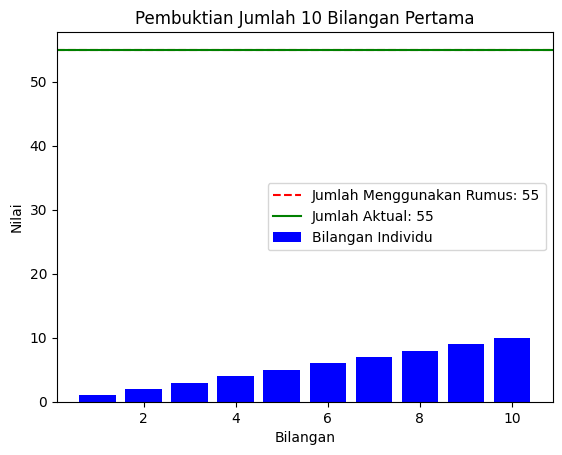

In [12]:
import matplotlib.pyplot as plt

def jumlah_n_bilangan(n):
    return n * (n + 1) // 2

def verifikasi_jumlah(n):
    return sum(range(1, n + 1)) == jumlah_n_bilangan(n)

n = 10
hasil_pembuktian = verifikasi_jumlah(n)
print(f"Pembuktian untuk n={n}: {hasil_pembuktian}")

# Visualisasi dengan matplotlib
bilangan = list(range(1, n + 1))
jumlah = jumlah_n_bilangan(n)
total = sum(bilangan)

fig, ax = plt.subplots()

# Menampilkan jumlah bilangan dengan grafik batang
ax.bar(bilangan, bilangan, label='Bilangan Individu', color='blue')

# Menampilkan total yang dihitung menggunakan rumus
ax.axhline(y=jumlah, color='red', linestyle='--', label=f'Jumlah Menggunakan Rumus: {jumlah}')
ax.axhline(y=total, color='green', linestyle='-', label=f'Jumlah Aktual: {total}')

# Menambahkan label dan judul
ax.set_xlabel('Bilangan')
ax.set_ylabel('Nilai')
ax.set_title(f'Pembuktian Jumlah {n} Bilangan Pertama')
ax.legend()

plt.show()
